In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
import plotly.express as px
from sklearn.kernel_ridge import KernelRidge
from sklearn.kernel_approximation import RBFSampler
import time


In [ ]:

class RFF_regression:


  def __init__(self, num_features):
      self.num_features= num_features
      self.model = ridge = Ridge(alpha=1.0)
      self.rff_feature = RBFSampler(n_components=self.num_features, gamma = 'scale')



  def fit(self, X,y):

    # Transform the input features using the RFF
    transformed_X = self.rff_feature.fit_transform(X)

    # Fit a ridge regression model on the transformed features
    self.model.fit(transformed_X, y)


  def predict(self, X):
    transformed_X = self.rff_feature.fit_transform(X)
    return self.model.predict(transformed_X)


In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test):
    # Train and evaluate a linear regression model
    print("Linear Regression:")
    model1 = LinearRegression()
    model1.fit(X_train, y_train)
    y_train_pred = model1.predict(X_train)
    y_test_pred = model1.predict(X_test)
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training score:", r2_score(y_train, y_train_pred))
    print("Testing score:", r2_score(y_test, y_test_pred),"\n")

    # Train and evaluate a Ridge regression model
    print("Ridge Regression:")
    model2 = Ridge(alpha=1.0)
    model2.fit(X_train, y_train)
    y_train_pred = model2.predict(X_train)
    y_test_pred = model2.predict(X_test)
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training score:", r2_score(y_train, y_train_pred))
    print("Testing score:", r2_score(y_test, y_test_pred),"\n")


    # Train and evaluate a Ridge regression model
    print("Ridge kernel Regression:")
    model3 = KernelRidge(alpha=1.0, kernel='rbf')
    model3.fit(X_train, y_train)
    y_train_pred = model3.predict(X_train)
    y_test_pred = model3.predict(X_test)
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training score:", r2_score(y_train, y_train_pred))
    print("Testing score:", r2_score(y_test, y_test_pred),"\n")

    # Train and evaluate a RFF regression model
    print("Ridge RFF Regression:")
    model4 = RFF_regression(5000)
    model4.fit(X_train, y_train)
    y_train_pred = model4.predict(X_train)
    y_test_pred = model4.predict(X_test)
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training score:", r2_score(y_train, y_train_pred))
    print("Testing score:", r2_score(y_test, y_test_pred),"\n")



In [ ]:
path = '/content/avocado.csv'

df = pd.read_csv(path, index_col=0)
df.head(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [ ]:


# Feature engineering: calculate average price over 4-week period
#We create a new feature, the average price over a 4-week period, using the rolling() method.
#df['AvgPrice4Weeks'] = df['AveragePrice'].rolling(window=4).mean()
'''
df.Date = pd.to_datetime(df.Date)
df = df.assign(
    order_month = df.Date.dt.month_name(),
    order_week_of_the_year =  df.Date.dt.weekofyear,
    order_year = df.Date.dt.year
)
'''

df=df.dropna()
# create a copy of df for obvious reasons
df1 = df.copy(deep=True)

le = LabelEncoder()
df1['type_encoded'] = le.fit_transform(df1['type'])
df1.drop('type',axis=1, inplace=True)

#df1.drop('Unamed:0', axis=1)

numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
X = df1[numerical_cols].drop('AveragePrice', axis=1)
y = df1['AveragePrice']

# create a copy of df for obvious reasons
df1 = df.copy(deep=True)
df1.head(10)
df1.drop(['Date','year'],axis=1, inplace=True)



# Apply the f_regression test to select the 8 most relevant features
selector = SelectKBest(f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Print the names of the selected features
mask = selector.get_support()  # list of booleans for selected features
selected_features = X.columns[mask]
print(selected_features)

# Split the dataset into training and testing sets
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
y = df1['AveragePrice']
X = df1[numerical_cols].drop('AveragePrice', axis=1)

# Apply the f_regression test to select the 8 most relevant features
selector = SelectKBest(f_regression, k=7)
X_new = selector.fit_transform(X, y)

# Print the names of the selected features
mask = selector.get_support()  # list of booleans for selected features
selected_features = X.columns[mask]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X.head()

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'type_encoded'],
      dtype='object')


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [ ]:
path = '/content/Housing.csv'

df = pd.read_csv(path, index_col=0)
df.head(20)


In [ ]:
df=df.dropna()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

y = np.array(df.index)
X = df[numerical_cols]


X.head()

In [ ]:



# Apply the f_regression test to select the 8 most relevant features
selector = SelectKBest(f_regression, k=8)
X_new = selector.fit_transform(X, y)

# Print the names of the selected features
mask = selector.get_support()  # list of booleans for selected features
selected_features = X.columns[mask]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
evaluate_models(X_train, X_test, y_train, y_test)

Linear Regression:
Training MSE: 0.15359633074011725
Testing MSE: 0.15456886489668764
Training score: 0.05141283364438476
Testing score: 0.05106436183161067 

Ridge Regression:
Training MSE: 0.15366583944686232
Testing MSE: 0.15464942299539847
Training score: 0.050983558629476344
Testing score: 0.05056979618373014 

Ridge kernel Regression:
Training MSE: 0.1031418105936123
Testing MSE: 0.10710473913839338
Training score: 0.3630121411602961
Testing score: 0.34245810724506265 

Ridge RFF Regression:
Training MSE: 0.2897578233909505
Testing MSE: 0.23544618051261879
Training score: -0.7894994710834116
Testing score: -0.4454610358197666 



In [ ]:
def mse_and_time(rff_features, X_train, y_train, X_test, y_test):

  loss = []
  times = []
  a = 5

  for n in rff_features:

    # take average over a runs
    execution_time = 0
    mse = 0

    for i in  range(a):

      # init mdoel
      model = RFF_regression(n)

      # Start the timer
      start_time = time.time()

      #train model
      model.fit(X_train, y_train)

      # Stop the timer and calculate the execution time
      execution_time = execution_time + time.time() - start_time

      #calculate loss
      y_test_pred = model.predict(X_test)
      mse = mse + mean_squared_error(y_test, y_test_pred)

      #print state
      print("I am currently in run with ", n ," RFFs")

    # append on lists
    loss.append(mse/a)
    times.append(execution_time/a)

  return loss, times



In [ ]:
def kernel_loss_and_time(X_train, y_train, X_test, y_test):

  model3 = KernelRidge(alpha = 1.0, kernel='linear')

  start_time = time.time()

  model3.fit(X_train, y_train)
  execution_time = time.time() - start_time

  y_train_pred = model3.predict(X_train)
  y_test_pred = model3.predict(X_test)
  mse = mean_squared_error(y_test, y_test_pred)


  return mse, execution_time

In [ ]:
# saved data
rff_features = [5,10,20,50,100,200,500,1000,2000,5000,10000]

# avocadoo dataset
mse_avocado = [0.2218158468978538, 0.30604635649168443, 0.5123599747814667, 0.637103578694016, 0.8442753017871775, 0.5006532989310996, 0.3465875368278294, 0.18684098678609257, 0.2620432368393558, 0.3020937393914499, 0.26356931476555645]
times_avocado = [0.0068743228912353516, 0.009099864959716797, 0.014585781097412109, 0.03446316719055176, 0.08981609344482422, 0.21281900405883789, 0.7719499588012695, 1.0726152896881103, 3.796946811676025, 19.05095386505127, 69.93398547172546]

kernel_mse_avocado = 0.10710473913839338
kernel_computing_time = 45.873093605041504


#Wine Quality dataset

In [ ]:

import matplotlib.pyplot as plt

def plot_results(Dataset, RFF_features, mse, computing_times, RBF_kernel_mse, RBF_kernel_time):
    # Create figure and axis objects
    fig, ax1 = plt.subplots(figsize = (10,7))

    # Plot the first y-value on the left y-axis
    ax1.plot(RFF_features, mse, color='tab:blue', label='MSE', marker = 'x', linewidth=3.0)
    ax1.set_xlabel('Feature Dimension')
    ax1.set_ylabel('MSE')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis object on the right side
    ax2 = ax1.twinx()

    # Plot the second y-value on the right y-axis
    ax2.plot(RFF_features, computing_times, color='darkred', label='Computing Times', marker = 'x', linewidth=3.0)
    ax2.set_ylabel('Computing Time')
    ax2.tick_params(axis='y', labelcolor='darkred')

    # Plot the dotted horizontal line for the RBF kernel
    ax1.axhline(y=RBF_kernel_mse, color='tab:blue', linestyle='dotted', label='RBF Kernel MSE')
    ax2.axhline(y=RBF_kernel_time, color='darkred', linestyle='dotted', label='RBF Kernel computing time')

    # Set plot title and legends
    ax1.set_title('MSE and Computing Times of ' + Dataset)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Display the plot
    plt.show()




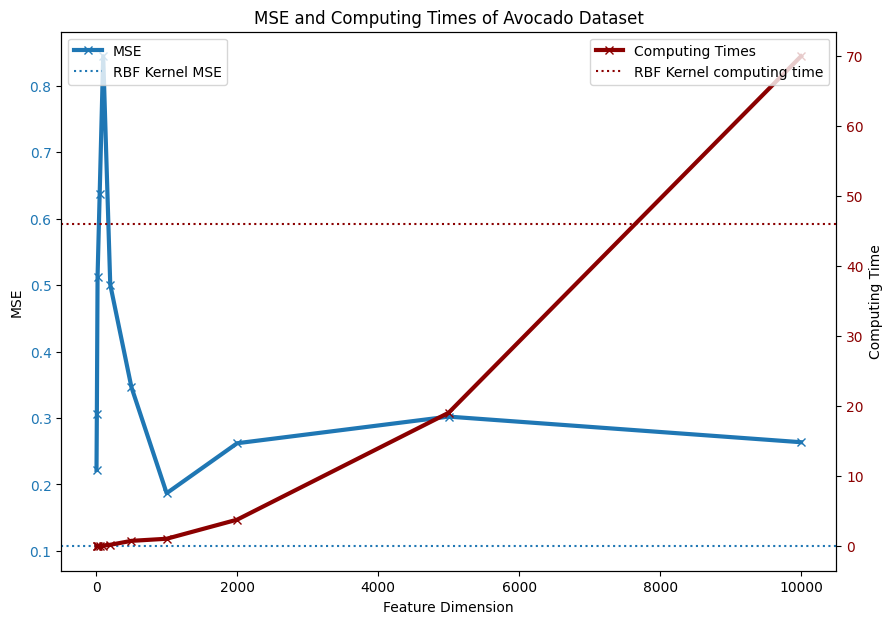

In [ ]:

plot_results('Avocado Dataset', rff_features, mse_avocado, times_avocado, kernel_mse_avocado,46)

# Wine Dateset


In [ ]:
wine = pd.read_csv('/content/WineQT.csv', index_col=0)

X = wine.loc[:, wine.columns!='quality']
y = wine["quality"]
X = X.drop("Id", axis = 1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1143 entries, 7.4 to 5.9
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1143 non-null   float64
 1   citric acid           1143 non-null   float64
 2   residual sugar        1143 non-null   float64
 3   chlorides             1143 non-null   float64
 4   free sulfur dioxide   1143 non-null   float64
 5   total sulfur dioxide  1143 non-null   float64
 6   density               1143 non-null   float64
 7   pH                    1143 non-null   float64
 8   sulphates             1143 non-null   float64
 9   alcohol               1143 non-null   float64
 10  quality               1143 non-null   int64  
 11  Id                    1143 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 116.1 KB


I am currently in run with  5  RFFs
I am currently in run with  5  RFFs
I am currently in run with  5  RFFs
I am currently in run with  5  RFFs
I am currently in run with  5  RFFs
I am currently in run with  10  RFFs
I am currently in run with  10  RFFs
I am currently in run with  10  RFFs
I am currently in run with  10  RFFs
I am currently in run with  10  RFFs
I am currently in run with  20  RFFs
I am currently in run with  20  RFFs
I am currently in run with  20  RFFs
I am currently in run with  20  RFFs
I am currently in run with  20  RFFs
I am currently in run with  50  RFFs
I am currently in run with  50  RFFs
I am currently in run with  50  RFFs
I am currently in run with  50  RFFs
I am currently in run with  50  RFFs
I am currently in run with  80  RFFs
I am currently in run with  80  RFFs
I am currently in run with  80  RFFs
I am currently in run with  80  RFFs
I am currently in run with  80  RFFs
I am currently in run with  100  RFFs
I am currently in run with  100  RFFs
I am

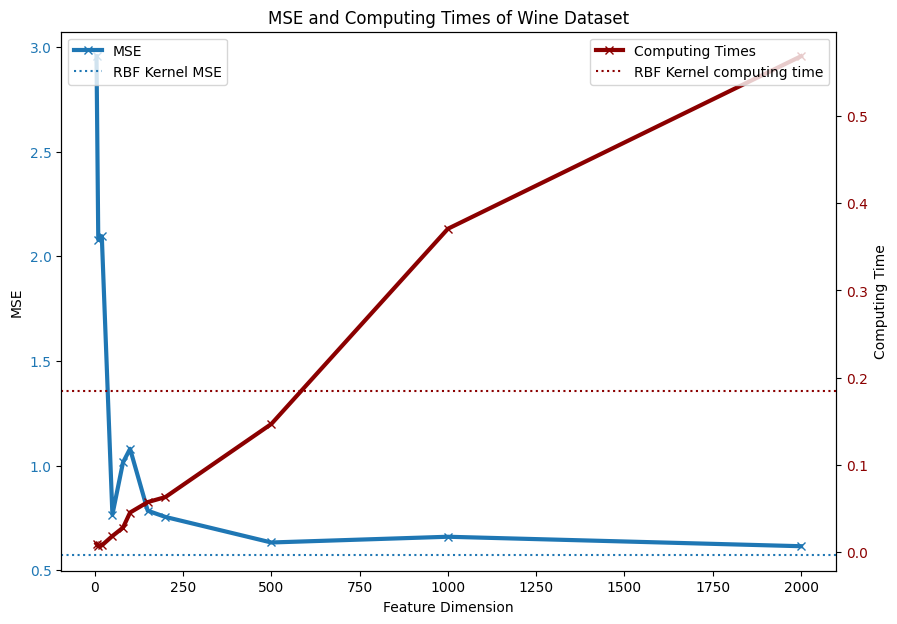

In [ ]:
from sklearn.datasets import load_wine



# split test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# evaluate
rff_features = [5,10,20,50,80,100,150,200,500,1000,2000]
loss, times = mse_and_time(rff_features,X_train, y_train, X_test, y_test)
kernel_loss, kernel_time = kernel_loss_and_time(X_train, y_train, X_test, y_test)

plot_results('Wine Dataset',rff_features, loss, times, kernel_loss, kernel_time)

# Hous Proces